In [11]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [12]:
# Importing the dataset
url ="https://raw.githubusercontent.com/Youssefsalem3/Boston-housing-price-prediction/main/HousingData.csvdataset = pd.read_csv(url)

In [13]:
#checking the data set
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [14]:
#checking data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [15]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
#CHECKING NULL VALUES
nulls=dataset.isnull().sum()
nulls[nulls!=0]
nulls

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [17]:
#REPLACING THE NULLS
dataset['CRIM'] = dataset['CRIM'].fillna(dataset['CRIM'].mean())
dataset['ZN'] = dataset['ZN'].fillna(dataset['ZN'].mean())
dataset['CHAS'] = dataset['CHAS'].fillna(dataset['CHAS'].mean())
dataset['INDUS'] = dataset['INDUS'].fillna(dataset['INDUS'].mean())
dataset['AGE'] = dataset['AGE'].fillna(dataset['AGE'].mean())
dataset['LSTAT'] = dataset['LSTAT'].fillna(dataset['LSTAT'].mean())

In [18]:
#CHECKING NULL VALUES AGAIN
nulls=dataset.isnull().sum()
nulls[nulls!=0]
nulls

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [19]:
#ASSIGNING THE INPUTS AND OUTPUTS
X=dataset.drop('MEDV',axis=1)
y=dataset['MEDV']

In [20]:
#Splitting data to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 13)

In [21]:
#APPLYING LINEAR REGRESSION ON THE DATA
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("R2 train=",regressor.score(X_train, y_train))
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print("R2 test=",regressor.score(X_test, y_test))


R2 train= 0.7292226324769471
R2 test= 0.7226899079816549


In [22]:
#Creating an array of x axis to represent the data we got
x_new = np.arange(102)
x_new.shape

(102,)

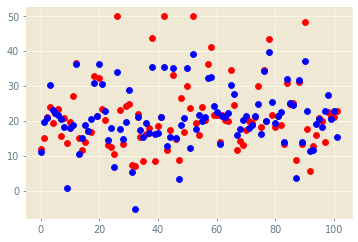

In [23]:
#plotting the real and predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4), dpi=70)
plt.style.use("Solarize_Light2")
# show the graph
plt.scatter(x_new, y_test,c='red' )
plt.scatter(x_new, y_pred,c='blue' )

In [24]:
#COMPARING PREDICTED TO THE REAL VALUE
from sklearn.metrics import r2_score
r2=r2_score((y_test),(y_pred))
r2

0.7226899079816549

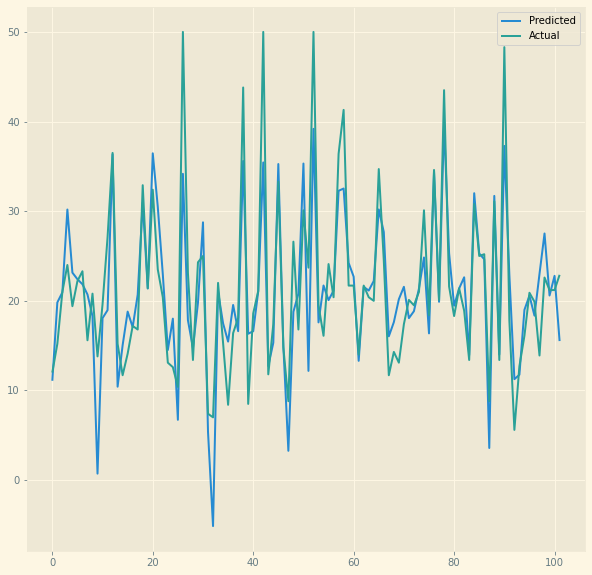

In [25]:
#Better visualization to see the relation between predicted and actual values
plt.figure(figsize=(10,10))
plt.plot(np.array(y_pred))
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()

In [26]:
#Trying XGBOOST SEEKING BETTER ACCUARCY
import xgboost as xgb
from numpy import loadtxt
xgb  = xgb.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred2 = xgb.predict(X_test)

In [31]:
#GETTING XGBOOST ACCUARCY
print(xgb.score(X_test,y_test))

0.8848108523548837


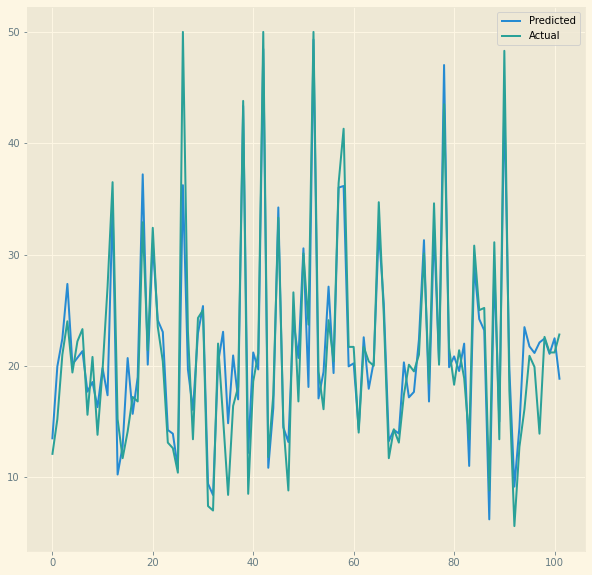

In [32]:
#plotting xgboost results clearly more accuarate
plt.figure(figsize=(10,10))
plt.plot(np.array(y_pred2))
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'])
plt.show()